<a href="https://colab.research.google.com/github/felixlys/KalmanFilterApplication/blob/main/Kodingan_Estimasi_pergerakan_Kapal_dengan_observer_deterministik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  0.           0.           4.4         10.296       19.39784
   28.6514536   41.88819474  55.1134791   70.15616939  88.83220443
  109.77023707 131.05825022 155.18776745 182.24056883 211.04448054
  240.16265909]
 [  0.           0.           2.42         4.3318       6.955322
    8.21938238  10.9789297   12.21442476  13.7699708   16.46830613
   18.92665571  20.2254023   22.37266552  24.94674024  27.06818455
   28.19568124]]
[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
[0, 2, 4, 6.5, 8, 10.5, 12, 13.5, 16, 18.5, 20, 22, 24.5, 26.7, 28, 30.5]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


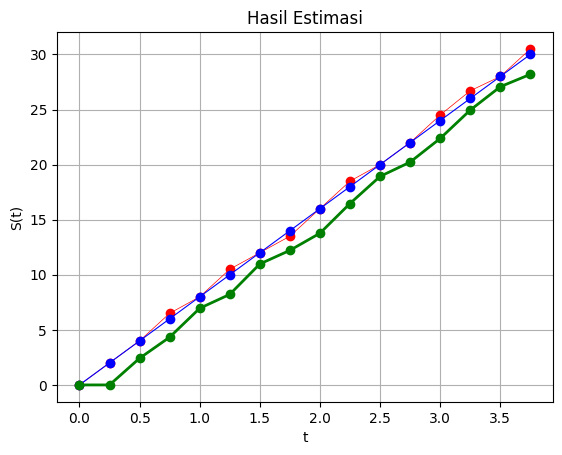

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('modelpergerakankapal.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet1']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([0, 1])
u = np.array([0, 0])
# Matriks gain Kalman L
L = np.array([2.2, 1.21])

# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))

# Loop untuk pembaruan perkiraan
for k in range(len(data_kolom_A) - 1):
    xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k] - np.dot(H, xh[:, k])))
print(xh)
# Menampilkan elemen-elemen dari kolom A
print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='red',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='blue',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,:], marker='o', linestyle='-',color='green',linewidth=2)
# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)


[[  0.           0.           2.8336       4.571424     6.98288096
   10.656475    14.79102025  20.25766575  27.33217019  36.39992426
   48.08949591  62.62968586  81.79624597 106.42626835 137.77396365
  178.69774763]
 [  0.           0.           1.55848      1.6571192    2.07200497
    2.95287896   3.60279542   4.62791296   5.97353828   7.67535696
    9.88317504  12.44453324  16.14164802  20.81025392  26.60584668
   34.4807122 ]]
[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
[0, 1.288, 1.64, 2, 2.8, 3.49, 4.45, 5.74, 7.38, 9.5, 12, 15.5, 20, 25.6, 33.114, 42]
[0, 1.2840254166877414, 1.6487212707001282, 2.117000016612675, 2.718281828459045, 3.4903429574618414, 4.4816890703380645, 5.754602676005731, 7.38905609893065, 9.487735836358526, 12.182493960703473, 15.642631884188171, 20.085536923187668, 25.790339917193062, 33.11545195869231, 42.52108200006278]


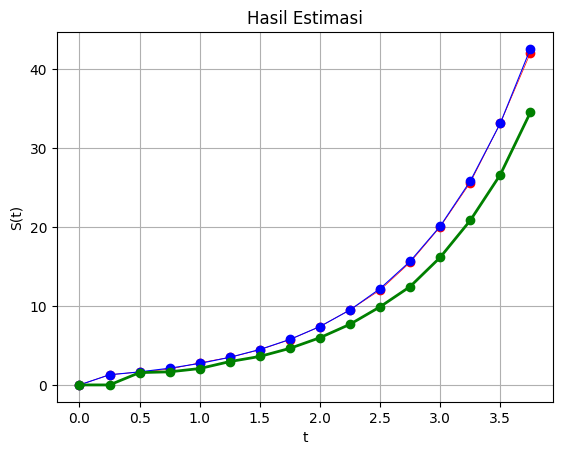

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('DataPergerakanKapal2.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet1']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([0, 1])
u = np.array([0, 0])

# Matriks gain Kalman L
L = np.array([2.2, 1.21])

# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))

# Loop untuk pembaruan perkiraan
for k in range(len(data_kolom_A) - 1):
    xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k] - np.dot(H, xh[:, k])))
print(xh)
# Menampilkan elemen-elemen dari kolom A
print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='red',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='blue',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,:], marker='o', linestyle='-',color='green',linewidth=2)
# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)

[[  0.           0.           2.695        4.1371       6.393519
    8.95579201  12.13571468  15.85473092  20.70573751  26.72702612
   33.71255551  42.14559434  53.04665619  66.0474332   82.34727003
  101.51830429 125.2662871  155.47921071 190.38449675 233.76438668
  286.8101098  351.66950794 431.33563433 526.47574779 646.30632396
  789.66190297 965.25723138]
 [  0.           0.           1.48225      1.4601675    1.89810583
    2.26339778   2.76748647   3.29082784   4.14892615   5.17872551
    6.17246764   7.41578179   9.33268582  11.35013598  14.07247144
   16.876681    20.65589699  25.91226163  30.85842506  37.74523074
   46.16050155  56.44489468  69.21657212  83.47451986 103.47035083
  125.40722633 153.01068247]]
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.000000

ValueError: ignored

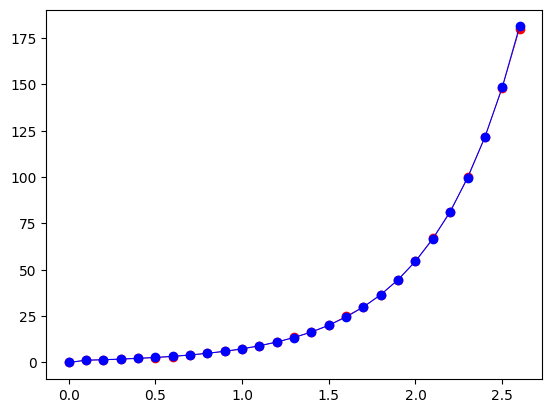

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('DataPergerakanKapal2.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet2']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=29, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=29, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=29, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([0, 1])
u = np.array([0, 0])

# Matriks gain Kalman L
L = np.array([2.2, 1.21])

# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))

# Loop untuk pembaruan perkiraan
for k in range(len(data_kolom_A) - 1):
    xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k] - np.dot(H, xh[:, k])))
print(xh)
# Menampilkan elemen-elemen dari kolom A
print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='red',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='blue',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,2:27], marker='o', linestyle='-',color='green',linewidth=2)
# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)

In [ ]:
import numpy as np

# Mengatur parameter distribusi normal
mean = [0, 0]  # Rata-rata untuk kedua variabel
cov_matrix = [[1, 0.5], [0.5, 1]]  # Matriks kovariansi (contoh)

# Menghasilkan 18 data terdistribusi normal dengan parameter di atas
data_normal = np.random.multivariate_normal(mean, cov_matrix, 18)

# Hasilnya adalah matriks 18x2 dengan 2 variabel terdistribusi normal
print(data_normal)


[[-0.07856076  1.73944293]
 [ 1.91639079  0.11354682]
 [ 0.25447527  0.52396959]
 [ 1.44851023 -1.10258338]
 [-1.16664514 -0.64069787]
 [ 0.90668224  2.06425534]
 [-0.5052416  -0.72766152]
 [-0.45173917 -1.4067243 ]
 [ 0.26297235  0.76925369]
 [-0.60585844 -0.54133883]
 [-2.47048198 -1.31284919]
 [ 0.26918871 -0.54251246]
 [-1.02960671 -0.61102393]
 [ 0.96034412  0.45626039]
 [-0.24454477  0.80784986]
 [-0.30069267 -1.71513612]
 [ 1.09301004 -0.24035036]
 [ 0.51175937  0.27949439]]


In [ ]:
import numpy as np
from numpy.linalg import eig
a=np.array([[-50,25,0,0],[25,-50,25,0],[0,25,-50,25],[0,0,25,-50]])
b=np.array([[-49,25,0,0],[25,-49,25,0],[0,25,-49,25],[0,0,25,-49]])
w,v=eig(a)
m,n=eig(b)
print('E-value kontinu',w)
print('E-vector kontinu',v)
print('E-value diskrit',m)
print('E-vector diskrit',n)
#sistem diskrit stabil apabila nilai eigen nya antara -1 hingga 1

E-value kontinu [-90.45084972 -65.45084972  -9.54915028 -34.54915028]
E-vector kontinu [[ 0.37174803  0.60150096 -0.37174803 -0.60150096]
 [-0.60150096 -0.37174803 -0.60150096 -0.37174803]
 [ 0.60150096 -0.37174803 -0.60150096  0.37174803]
 [-0.37174803  0.60150096 -0.37174803  0.60150096]]
E-value diskrit [-89.45084972 -64.45084972  -8.54915028 -33.54915028]
E-vector diskrit [[ 0.37174803  0.60150096 -0.37174803 -0.60150096]
 [-0.60150096 -0.37174803 -0.60150096 -0.37174803]
 [ 0.60150096 -0.37174803 -0.60150096  0.37174803]
 [-0.37174803  0.60150096 -0.37174803  0.60150096]]


In [ ]:
import numpy as np

# Mengatur parameter distribusi normal untuk data pertama
mean1 = 0  # Rata-rata untuk data pertama
std_dev1 = 1  # Deviasi standar untuk data pertama (contoh)

# Menghasilkan 18 data terdistribusi normal untuk data pertama
data_normal1 = np.random.normal(mean1, std_dev1, 18)

# Mengatur parameter distribusi normal untuk data kedua
mean2 = 0  # Rata-rata untuk data kedua
std_dev2 = 1  # Deviasi standar untuk data kedua (contoh)

# Menghasilkan 18 data terdistribusi normal untuk data kedua
data_normal2 = np.random.normal(mean2, std_dev2, 18)

# Hasilnya adalah dua array dengan data terdistribusi normal untuk satu variabel acak masing-masing
print("Data Normal Pertama:")
print(data_normal1)

print("\nData Normal Kedua:")
print(data_normal2)


Data Normal Pertama:
[ 0.25457985 -0.32913537  0.38361289 -0.80678643  0.07241302  0.09428083
  0.36135065 -0.50918571 -0.03551256  0.26446079  0.61056867 -0.08630889
  1.36553471 -0.45936071 -1.44438453 -0.04924073 -0.11189397 -1.16061106]

Data Normal Kedua:
[ 1.62317774  0.13564757 -0.08210856  1.60314165 -0.35426617 -1.0931484
  1.30137698 -1.07710892  0.06409196 -1.10926244 -0.42453304  0.39023234
 -0.29976429 -0.70994965  0.27106086  0.21329746  0.87179291 -0.06759695]


[[  0.           0.           4.4         10.296       19.39784
   28.6514536   41.88819474  55.1134791   70.15616939  88.83220443
  109.77023707 131.05825022 155.18776745 182.24056883 211.04448054
  240.16265909]
 [  0.           0.           2.42         4.3318       6.955322
    8.21938238  10.9789297   12.21442476  13.7699708   16.46830613
   18.92665571  20.2254023   22.37266552  24.94674024  27.06818455
   28.19568124]]
[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
[0, 2, 4, 6.5, 8, 10.5, 12, 13.5, 16, 18.5, 20, 22, 24.5, 26.7, 28, 30.5]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
RMSE antara nilai sebenarnya vs nilai model:
0.352668399491647
RMSE antara nilai sebenarnya vs nilai observer deterministik:
1.720556963714171
RMSE antara nilai sebenarnya vs nilai observer deterministik dengan noise:
2.3803823819274204


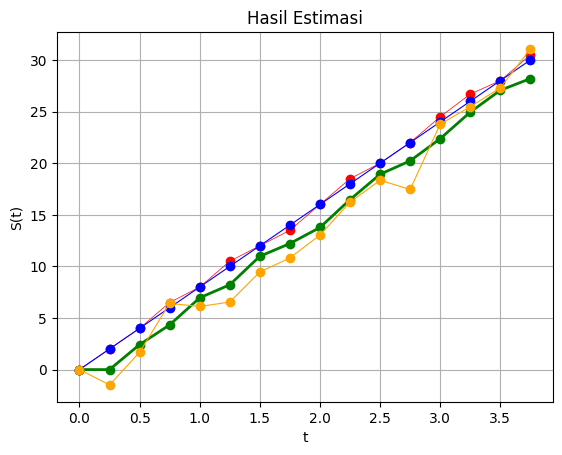

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('modelpergerakankapal.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet1']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([0, 1])
u = np.array([0, 0])
G=np.array([1, 1])
v=np.random.normal(0,1,15)
w=np.random.normal(0,1,15)
# Matriks gain Kalman L
L = np.array([2.2, 1.21])

# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))
xstok=np.zeros((2, len(data_kolom_A)))
# Loop untuk pembaruan perkiraan
for k in range(len(data_kolom_A) - 1):
    xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k] - np.dot(H, xh[:, k])))
print(xh)
for k in range(len(data_kolom_A) - 1):
    xstok[:, k + 1] = np.dot(A, xstok[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k]+v[k] - np.dot(H, xstok[:, k])))+w[k]

# Menampilkan elemen-elemen dari kolom A
print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='red',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='blue',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,:], marker='o', linestyle='-',color='green',linewidth=2)
plt.plot(data_kolom_A, xstok[1,:], marker='o', linestyle='-',color='orange',linewidth=0.8)
#RMSE1 nilai sebenarnya vs nilai model
MSE1=np.square(np.subtract(data_kolom_B,data_kolom_C)).mean()
RMSE1=math.sqrt(MSE1)
print('RMSE antara nilai sebenarnya vs nilai model:')
print(RMSE1)
#RMSE2 nilai sebenarnya vs nilai observer deterministik
MSE2=np.square(np.subtract(data_kolom_B, xh[1,:])).mean()
RMSE2=math.sqrt(MSE2)
print('RMSE antara nilai sebenarnya vs nilai observer deterministik:')
print(RMSE2)
#RMSE3 nilai sebenarnya vs nilai observer deterministik dengan noise
#RMSE2 nilai sebenarnya vs nilai observer deterministik
MSE3=np.square(np.subtract(data_kolom_B, xstok[1,:])).mean()
RMSE3=math.sqrt(MSE3)
print('RMSE antara nilai sebenarnya vs nilai observer deterministik dengan noise:')
print(RMSE3)
# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)

In [ ]:
print(v)

[-1.12018234e+00 -4.77589187e-04  2.74630778e-01 -2.07463401e-01
 -1.23417047e+00 -7.59043798e-01 -4.48374218e-01  1.18996427e-01
 -1.31896068e+00  3.34282866e-01 -1.69737203e+00  3.29597461e-02
  8.15332544e-01  2.79756685e-01  1.54272435e+00]


In [ ]:
print(w)
print(xh)
print(xstok)

[ 0.06244078 -1.81549595 -2.65025027 -0.60606447  1.4401696   1.1390681
 -1.31041006 -0.17374565  1.34032619  0.26066711 -2.63273478 -0.41816114
  0.65384272  0.21111698  0.20005994 -0.42895514 -1.10061682 -0.98214025
 -1.91765571  0.27865888  0.81920575 -0.46777526 -0.07151445  0.28152344
  0.81353743  0.27876733  0.55146815]
[[  0.           0.           2.695        4.1371       6.393519
    8.95579201  12.13571468  15.85473092  20.70573751  26.72702612
   33.71255551  42.14559434  53.04665619  66.0474332   82.34727003
  101.51830429 125.2662871  155.47921071 190.38449675 233.76438668
  286.8101098  351.66950794 431.33563433 526.47574779 646.30632396
  789.66190297 965.25723138]
 [  0.           0.           1.48225      1.4601675    1.89810583
    2.26339778   2.76748647   3.29082784   4.14892615   5.17872551
    6.17246764   7.41578179   9.33268582  11.35013598  14.07247144
   16.876681    20.65589699  25.91226163  30.85842506  37.74523074
   46.16050155  56.44489468  69.21657212 

[[  0.           0.           2.695        4.1371       6.393519
    8.95579201  12.13571468  15.85473092  20.70573751  26.72702612
   33.71255551  42.14559434  53.04665619  66.0474332   82.34727003
  101.51830429 125.2662871  155.47921071 190.38449675 233.76438668
  286.8101098  351.66950794 431.33563433 526.47574779 646.30632396
  789.66190297 965.25723138]
 [  0.           0.           1.48225      1.4601675    1.89810583
    2.26339778   2.76748647   3.29082784   4.14892615   5.17872551
    6.17246764   7.41578179   9.33268582  11.35013598  14.07247144
   16.876681    20.65589699  25.91226163  30.85842506  37.74523074
   46.16050155  56.44489468  69.21657212  83.47451986 103.47035083
  125.40722633 153.01068247]]
[[   0.           22.           25.62878929   31.16006345   37.71368726
    50.27333395   62.6241334    69.24681044   79.28961442   91.87908528
   100.94365063  116.03841573  130.13878169  150.17781726  172.82964462
   191.83632508  222.86833369  261.19330031  305.66479736

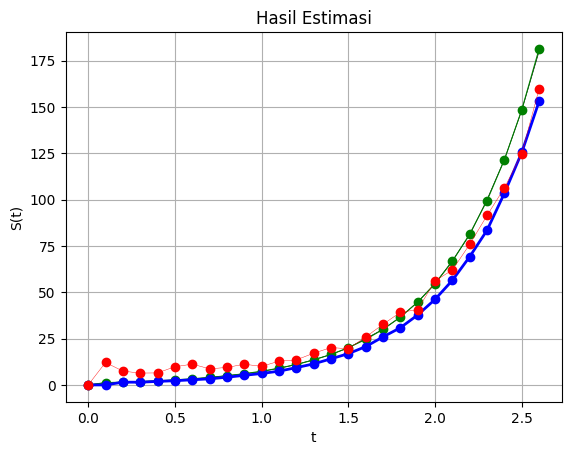

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('DataPergerakanKapal2.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet2']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=29, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=29, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=29, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([0, 1])
u = np.array([0, 0])
G=np.array([1, 1])
v=np.random.normal(0,1,len(data_kolom_A))
w=np.random.normal(0,1,len(data_kolom_A))
v_trans = (v- np.min(v)) / (np.max(v) - np.min(v)) * 10
# Matriks gain Kalman L
L = np.array([2.2, 1.21])

# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))
xstok=np.zeros((2, len(data_kolom_A)))
# Loop untuk pembaruan perkiraan
for k in range(len(data_kolom_A) - 1):
    xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L,(data_kolom_B[k] - np.dot(H, xh[:, k])))
print(xh)
for k in range(len(data_kolom_A) - 1):
    xstok[:, k + 1] = np.dot(A, xstok[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k]+v_trans[k] - np.dot(H, xstok[:, k])))
print(xstok)
# Menampilkan elemen-elemen dari kolom A
print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
plt.plot(data_kolom_A, data_kolom_B, linestyle='-',color='black',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='green',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,:], marker='o', linestyle='-',color='blue',linewidth=2)
plt.plot(data_kolom_A, xstok[1,:], marker='o', linestyle='-',color='red',linewidth=0.3)

# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)

In [ ]:
print()

[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
[0, 2, 4, 6.5, 8, 10.5, 12, 13.5, 16, 18.5, 20, 22, 24.5, 26.7, 28, 30.5]
[ 0.46865034  1.33148113  4.82600732  6.29355795  8.06166845 11.0103148
 12.53662099 13.44052183 16.43251205 16.21010922 19.21234337 23.34313336
 23.43972595 26.3177099  28.20405538 30.33680774]


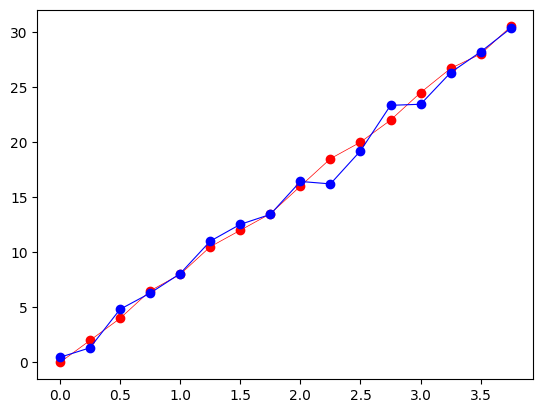

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('modelpergerakankapal.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet1']
v=np.random.normal(0,1, 16)
w=np.random.normal(0,1,15)

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)
noised_model=v+data_kolom_C
print(data_kolom_A)
print(data_kolom_B)
print(noised_model)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='red',linewidth=0.5)
plt.plot(data_kolom_A, noised_model, marker='o', linestyle='-',color='blue',linewidth=0.8)

[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
[0, 2, 4, 6.5, 8, 10.5, 12, 13.5, 16, 18.5, 20, 22, 24.5, 26.7, 28, 30.5]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[  0.           0.           6.82        12.276       27.8938
   36.43244     61.991072    72.2407136  105.97614368 120.05362758
  166.2456469  179.01522372 238.71173153 250.62092216 327.37689341
  330.74972791]
 [  0.           0.           6.82         5.456       15.6178
    8.53864     25.558632    10.2496416   33.73543008  14.0774839
   46.19201932  12.76957682  59.69650781  11.90919062  76.75597125
    3.3728345 ]]
RMSE antara nilai sebenarnya vs nilai model:
0.352668399491647
RMSE antara nilai sebenarnya vs nilai observer deterministik:
19.276342753422576
RMSE antara nilai sebenarnya vs nilai observer deterministik dengan noise:
34.76362031733828


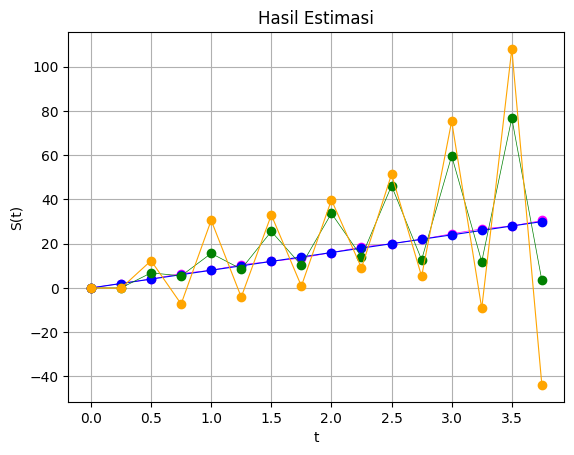

In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('modelpergerakankapal.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet1']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([[0, 1],[0,0]])
u = np.array([0, 0])
P = np.array([[1e-4, 0],[0,1e-4]])
# Matriks gain Kalman L
L = np.array([2.2, 1.21])
G = np.array([1,1]).T
v=np.random.normal(0,1,15)
w=np.random.normal(0,1,15)
# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))
xh_stokastik = np.zeros((2, len(data_kolom_A)))
xhmin_kalman=np.zeros((2, len(data_kolom_A)))
xh_kalman=np.zeros((2, len(data_kolom_A)))
#sistem deterministik yg diterapkan observer deterministik
for k in range(len(data_kolom_A) - 1):
    xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k] - np.dot(H, xh[:, k])))
#sistem stokastik yang dilengkapi dengan noise sistem n pengukuran, diestimasi dgn observer deterministik
for k in range(len(data_kolom_A) - 1):
    xstok[:, k + 1] = np.dot(A, xstok[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k]+v[k] - np.dot(H, xstok[:, k])))+w[k]

print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
print(xh_kalman)
print(xh)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='magenta',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='blue',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,:], marker='o', linestyle='-',color='green',linewidth=0.5)
plt.plot(data_kolom_A, xstok[1,:], marker='o', linestyle='-',color='orange',linewidth=0.8)

#RMSE1 nilai sebenarnya vs nilai model
MSE1=np.square(np.subtract(data_kolom_B,data_kolom_C)).mean()
RMSE1=math.sqrt(MSE1)
print('RMSE antara nilai sebenarnya vs nilai model:')
print(RMSE1)
#RMSE2 nilai sebenarnya vs nilai observer deterministik
MSE2=np.square(np.subtract(data_kolom_B, xh[1,:])).mean()
RMSE2=math.sqrt(MSE2)
print('RMSE antara nilai sebenarnya vs nilai observer deterministik:')
print(RMSE2)
#RMSE3 nilai sebenarnya vs nilai observer deterministik dengan noise
#RMSE2 nilai sebenarnya vs nilai observer deterministik
MSE3=np.square(np.subtract(data_kolom_B, xstok[1,:])).mean()
RMSE3=math.sqrt(MSE3)
print('RMSE antara nilai sebenarnya vs nilai observer deterministik dengan noise:')
print(RMSE3)
# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)


In [ ]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Data t dan S(t)

# Membuka file Excel
workbook = openpyxl.load_workbook('modelpergerakankapal.xlsx')

# Memilih worksheet (lembar kerja) tertentu
worksheet = workbook['Sheet1']

# Membuat list untuk menyimpan elemen dari kolom A dan baris A2 hingga A18
data_kolom_A = []
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=1, max_col=1, values_only=True):
    data_kolom_A.extend(row)
data_kolom_B =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=2, max_col=2, values_only=True):
    data_kolom_B.extend(row)
data_kolom_C =[]
for row in worksheet.iter_rows(min_row=3, max_row=18, min_col=3, max_col=3, values_only=True):
    data_kolom_C.extend(row)

# Matriks A, B, H, dan vektor u
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 0])
H = np.array([[0, 1],[0,0]])
u = np.array([0, 0])
P = np.array([[1e-4, 0],[0,1e-4]])
# Matriks gain Kalman L
L = np.array([2.2, 1.21])
G = np.array([1,1]).T
v=np.random.normal(0,1,15)
w=np.random.normal(0,1,15)
# Inisialisasi perkiraan awal
xh = np.zeros((2, len(data_kolom_A)))
xh_stokastik = np.zeros((2, len(data_kolom_A)))
xhmin_kalman=np.zeros((2, len(data_kolom_A)))
xh_kalman=np.zeros((2, len(data_kolom_A)))

for k in range(len(data_kolom_A) - 1):
  xh[:, k + 1] = np.dot(A, xh[:, k]) + np.dot(B, u) + np.dot(L,(data_kolom_B[k] - np.dot(H, xh[:, k])))
  xstok[:, k + 1] = np.dot(A, xstok[:, k]) + np.dot(B, u) + np.dot(L, (data_kolom_B[k]+v[k] - np.dot(H, xstok[:, k])))
  Pmin = np.dot(A, np.dot(P, A.T)) +  10000*np.dot(G, G.T)
  xhmin_kalman[:, k + 1] = np.dot(A, xhmin_kalman[:, k]) + np.dot(B, u)
  K = np.dot(np.dot(Pmin, H.T), np.linalg.inv(np.dot(np.dot(H, Pmin), H.T) + 10))
  xh_kalman[:, k + 1] = xhmin_kalman[:, k + 1] + np.dot(K, data_kolom_B[k + 1] - np.dot(H, xhmin_kalman[:, k + 1]))
  P = np.dot(np.identity(2) - np.dot(K, H), Pmin)
print(data_kolom_A)
print(data_kolom_B)
print(data_kolom_C)
print(xh_kalman)
print(xh)
plt.plot(data_kolom_A, data_kolom_B, marker='o', linestyle='-',color='magenta',linewidth=0.5)
plt.plot(data_kolom_A, data_kolom_C, marker='o', linestyle='-',color='blue',linewidth=0.8)
plt.plot(data_kolom_A, xh[1,:], marker='o', linestyle='-',color='green',linewidth=0.5)
plt.plot(data_kolom_A, xstok[1,:], marker='o', linestyle='-',color='orange',linewidth=0.8)
plt.plot(data_kolom_A, xh_kalman[1,:], marker='o', linestyle='-',color='red',linewidth=0.8)
#RMSE1 nilai sebenarnya vs nilai model
MSE1=np.square(np.subtract(data_kolom_B,data_kolom_C)).mean()
RMSE1=math.sqrt(MSE1)
print('RMSE antara nilai sebenarnya vs nilai model:')
print(RMSE1)
#RMSE2 nilai sebenarnya vs nilai observer deterministik
MSE2=np.square(np.subtract(data_kolom_B, xh[1,:])).mean()
RMSE2=math.sqrt(MSE2)
print('RMSE antara nilai sebenarnya vs nilai observer deterministik:')
print(RMSE2)
#RMSE3 nilai sebenarnya vs nilai observer deterministik dengan noise
#RMSE2 nilai sebenarnya vs nilai observer deterministik
MSE3=np.square(np.subtract(data_kolom_B, xstok[1,:])).mean()
RMSE3=math.sqrt(MSE3)
print('RMSE antara nilai sebenarnya vs nilai observer deterministik dengan noise:')
print(RMSE3)
# Menambahkan label sumbu x dan y
plt.xlabel('t')
plt.ylabel('S(t)')

# Menambahkan judul
plt.title('Hasil Estimasi')


# Menampilkan grid
plt.grid(True)
